**Introduction**

The purpose of this notebook is to explain and explore Angular Correlations as a way to identify and extract strucutural information from glasses.  It takes things step by step, and provides an overview of what has been discovered, some interesting things to consider and it provides some insight into what could be improved on.

It dones't go too far into the math or programming as those things are mostly handled using [pyXEM](https://github.com/pyxem/pyxem), [symSim](https://github.com/CSSFrancis/SymSim) and by [AmorphSim](https://github.com/CSSFrancis/AmorphSim) which are packages that I have helpped create, or created to preform simulations and to extract strucuture from some material.

**Overview**

This notebook is broken down into 6 sections.  Together this make up the bulk of the figures and discussion that will make up the Metallic Glass Strucuture/Angular Correlations paper that I will be writing and will be relased alongside the paper.

1. <a href='#Part1'> Strucutral Model for Metallic Glasses </a>
2. <a href='#Part2'> Angular Correlations </a>
3. <a href='#Part3'> Building a basic Simulation using SymSim</a>
4. <a href='#Part4'> Building an Advanced Simulation using AmorphSim</a>
5. <a href='#Part5'> Recovering Strucuture from a Glass using Angular Correlations</a>
6. <a href='#Part6'> Example with Experimental Data</a>

In [1]:
import AmorphSim
import pyxem
from SymSim.sim.cluster import Cluster
import matplotlib.pyplot as plt
import numpy as np

<a id='Part1'></a>  **Part 1: Strucutural Model for Metallic Glasses**

For the most part we consider the structure of metallic glasses to be made up of ordered clusters inside of an amorphous matrix.  In diffraction from these stuctures we consider the symmetry of the cluster, the disorder of the cluster and the orientation of the symmetrical axis as factors in the intensity of the diffraction. 

More specifically we can use the shape function for a nanocrystal at every single diffraction spot to help define the shape of the diffraction vector in reciporical space. 

This equation is give by:

$\eta(s,r) = [\frac{3[sin(2\pi*s*r)- 2\pi*s*r*cos(2\pi*s*r)]}{(2*\pi*s*r)^3}]^2 $

Where s is the deviation from the ewaldsphere and r is the radius of the nanocrystal.


**This leads to the question of how do you recover the deviation parameter for some signal?**

Let's consider some perfect on axis 6-fold symmetry. With no high k features.

In [2]:
c6 = Cluster(symmetry=6)
c6_diff = pyxem.ElectronDiffraction2D(c6.get_diffraction())
c6_diff.unit = "k_nm^-1"
c6_diff.beam_energy=200
c6pol = c6_diff.get_azimuthal_integral2d(npt_rad=100)

<a id='Part2'></a>  **Part 2: Angular Correlations** 

We can used Angular Correlations to measure the symmetry for some diffraction pattern.  Using pyXEM we can can take the angular correlation and effectively what we are doing is orienting the symmetry with respect to itself. In the process we lose some of the information about the symmetry but that is rather in consequential. 

The equation for the Angular Correlation is given by:
$C(\phi) = \frac{<I(\theta)*I(\theta + \phi)>_\theta + <I(\theta)>_\theta^2}{<I(\theta)>_\theta^2}$

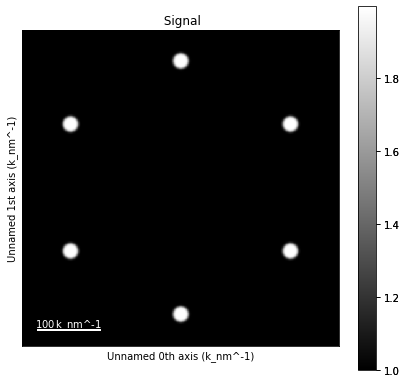

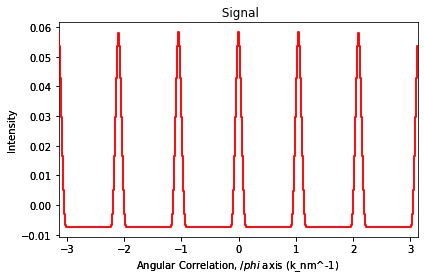

In [3]:
c6_diff.plot()
# One slice along the angular correlation
c6pol.get_angular_correlation().isig[:,180.].plot()

Note that in the perfect diffraction case the angular correlation is exactly even.  This makes sense becuase the intensity for each of the diffraction spots is exactly equal.  In this case the intensity of each of the diffraction spots is related to the volume of the cluster inside of some volume and the disorder of the cluster.

The Volume is defined by:

$\xi = \frac{Volume inside Column}{Volume of Particle} = \frac{\pi/3 (h+r)^2*(2r-h)}{4/3\pi*r^3}$

And the disorder can be estimated by the Debye Waller Factor

In [4]:
# defining some functions for rotation of the clusters (eventaully this will be upstreamed)
def get_rotation_x(angle):
    rotation_x = [[1,0,0],[0,np.cos(angle), -np.sin(angle)],[0,np.sin(angle), np.cos(angle)]]
    return rotation_x
def get_rotation_y(angle):
    rotation_y = [[np.cos(angle), 0, np.sin(angle)],[0,1,0], [-np.sin(angle), 0, np.cos(angle)]]
    return rotation_y
def get_rotation_z(angle):
    rotation_z = [[np.cos(angle), -np.sin(angle),0],[np.sin(angle),np.cos(angle),0], [0,0,1]]
    return rotation_z

Let us now consider what happens if we tilt along some axis.  If we tilt along one of the symmetry axes we see that the intensity of the peaks largely stays the same for every peak besides the 0 and $\pi$ peaks. Fridel symmetry is largely conserved in this case because the axis is along one of the points. 

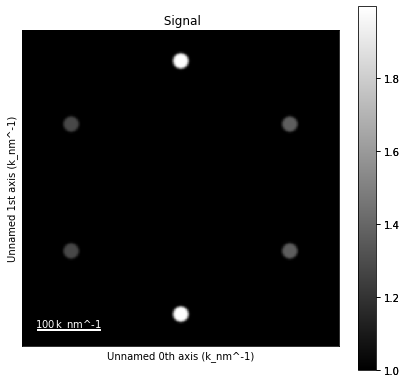

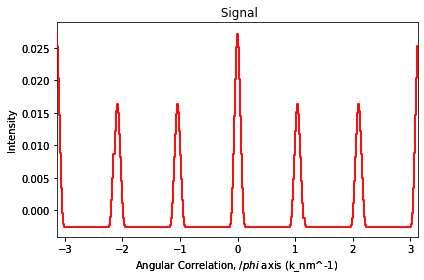

In [5]:
# 9 degrees off axis
c6 = Cluster(symmetry=6,rotation_3d=get_rotation_x(np.pi/30))
c6_diff = pyxem.ElectronDiffraction2D(c6.get_diffraction())
c6_diff.unit = "k_nm^-1"
c6_diff.beam_energy=200
c6pol = c6_diff.get_azimuthal_integral2d(npt_rad=100)
c6_diff.plot()
# One slice along the angular correlation
c6pol.get_angular_correlation().isig[:,180.].plot()

Let us now consider what happens if we tilt along some arbitrary axis. We see that the equivilance that we see between $\pi/3$,$2\pi/3$, $-\pi/3$, $-2\pi/3$ disappears and instead we see that $\pi/3$ = $-\pi/3$

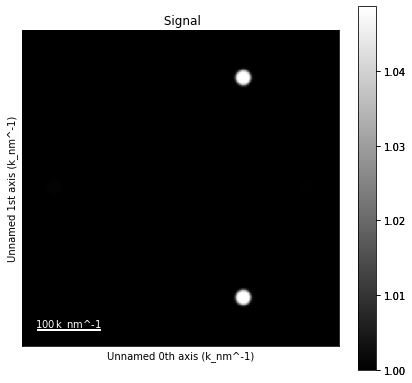

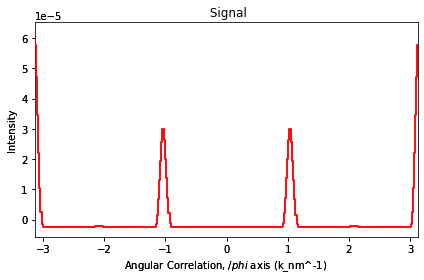

In [29]:
import numpy as np
# 9 degrees off axis but tilted along a random axis. 
c6 = Cluster(symmetry=6,radius=4,
             rotation_2d=get_rotation_z(np.pi/6),
             rotation_3d=get_rotation_x(np.pi/40))
c6_diff = pyxem.ElectronDiffraction2D(c6.get_diffraction())
c6_diff.unit = "k_nm^-1"
c6_diff.beam_energy=200
c6pol = c6_diff.get_azimuthal_integral2d(npt_rad=100)
c6_diff.plot()
# One slice along the angular correlation
c6pol.get_angular_correlation().isig[:,180.].plot()


In [7]:
from SymSim.sim.EwaldSphere import EwaldSphere
from SymSim.sim.cluster import Cluster
import numpy as np

[[ 3.9969209   0.15691819]
 [-3.9969209  -0.15691819]]
(200,)
[[ 3.98971189  0.2867038 ]
 [-3.98971189 -0.2867038 ]]
(200,)
[[ 3.98820314  0.3069783 ]
 [-3.98820314 -0.3069783 ]]
(200,)
[[ 3.99448383  0.20999753]
 [-3.99448383 -0.20999753]]
(200,)
[[ 3.99986548  0.03280483]
 [-3.99986548 -0.03280483]]
(200,)


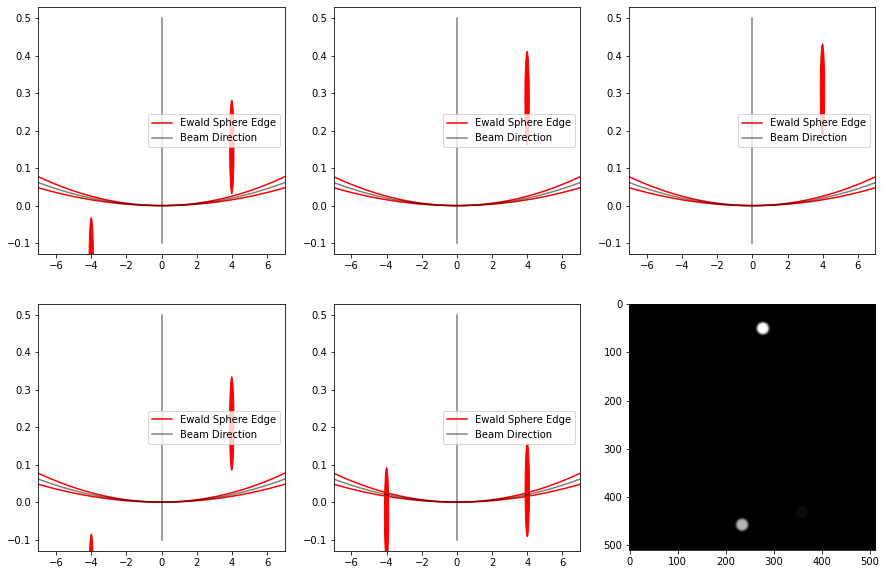

In [21]:
c6 = Cluster(symmetry=10,radius=4,
             rotation_2d=get_rotation_z(np.pi/6),
             rotation_3d=get_rotation_x(np.pi/40))
thick_sphere = EwaldSphere(acc_voltage=200, convergence_angle=0.6)
c6.plot_2d(ewald_sphere=thick_sphere, figsize=(15,10))
plt.show()

/Users/shaw/.virtualenvs/SymSim/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


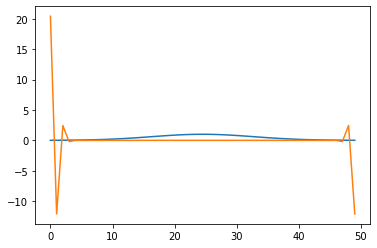

In [19]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-20,40)
g = gaussian(x,10,10)
plt.plot(g)
plt.plot(np.fft.fft(g))

This doesn't really mean that much, because it is hard to see when it might actually occur....

In [9]:
sixFoldLibrary = [[Cluster(symmetry=6,rotation_2d=get_rotation_z(two_d_rot), rotation_3d=get_rotation_x(three_d_r)).get_diffraction() for two_d_rot in np.linspace(0,np.pi/3,20)] for three_d_r in np.linspace(0,np.pi/5,20)] 

In [10]:
sixFoldLibrary = pyxem.ElectronDiffraction2D(sixFoldLibrary)

In [11]:
sixFoldLibrary.axes_manager[0].scale = 3
sixFoldLibrary.axes_manager[1].scale = 1.8
sixFoldLibrary.axes_manager[0].unit = "degrees"
sixFoldLibrary.axes_manager[1].unit = "degrees"
sixFoldLibrary.axes_manager[0].name = "Rotation in Plane"
sixFoldLibrary.axes_manager[1].name = "Rotation out of Plane"

<IPython.core.display.Javascript object>


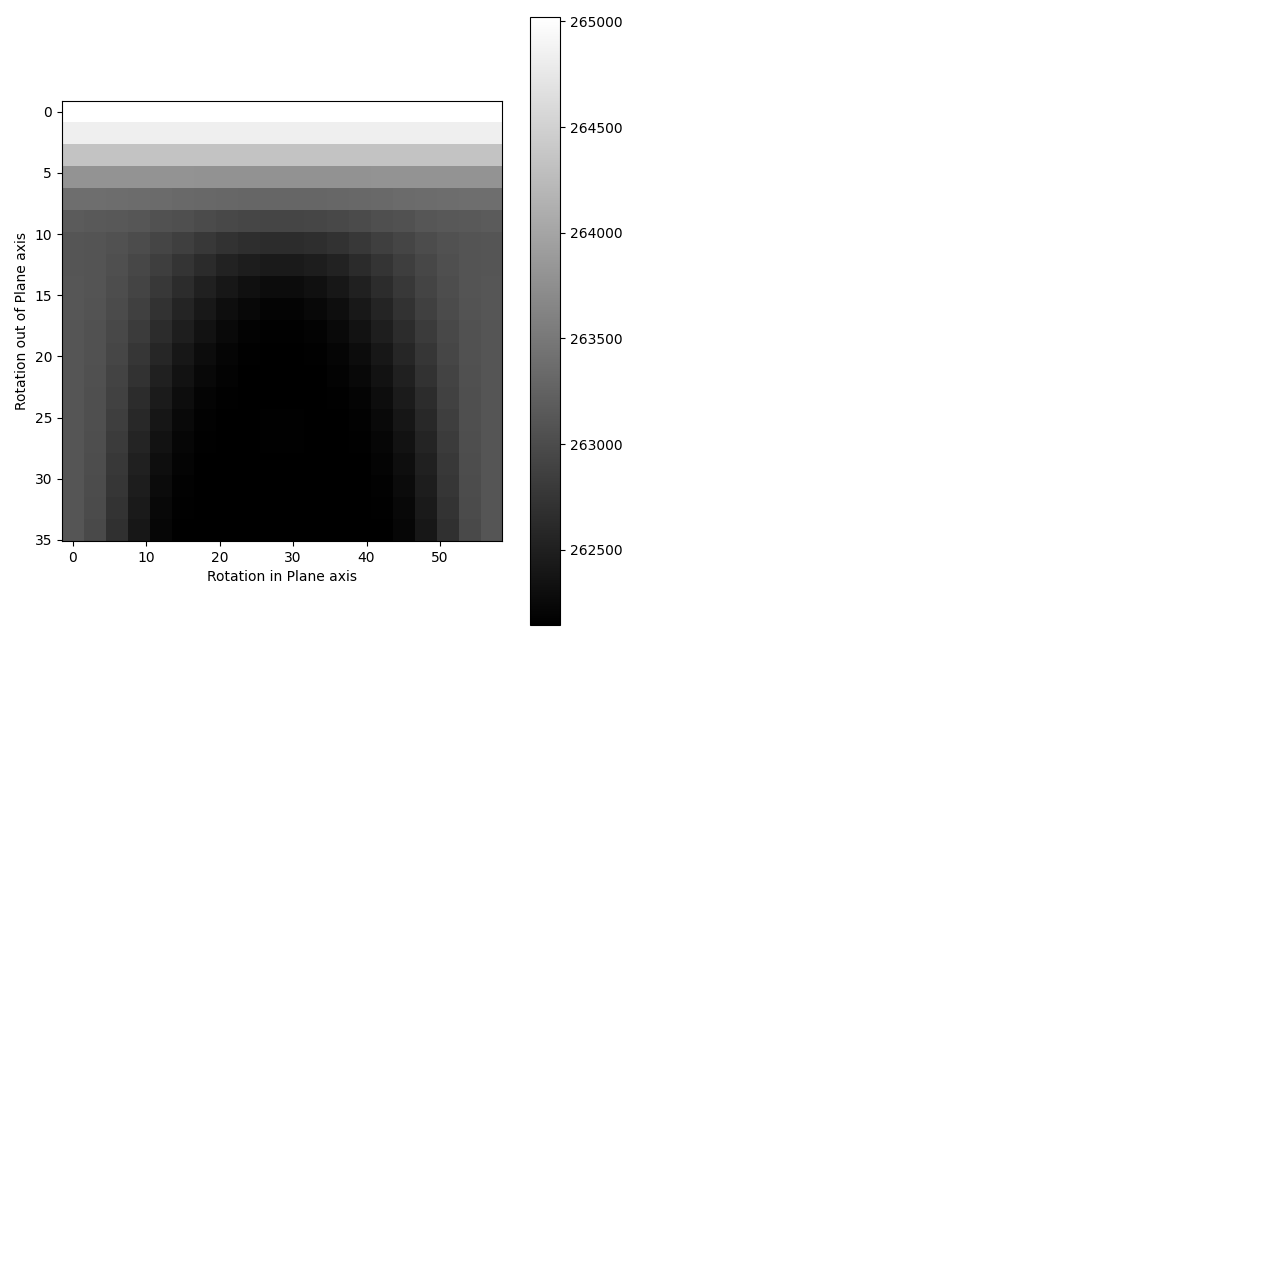

<IPython.core.display.Javascript object>


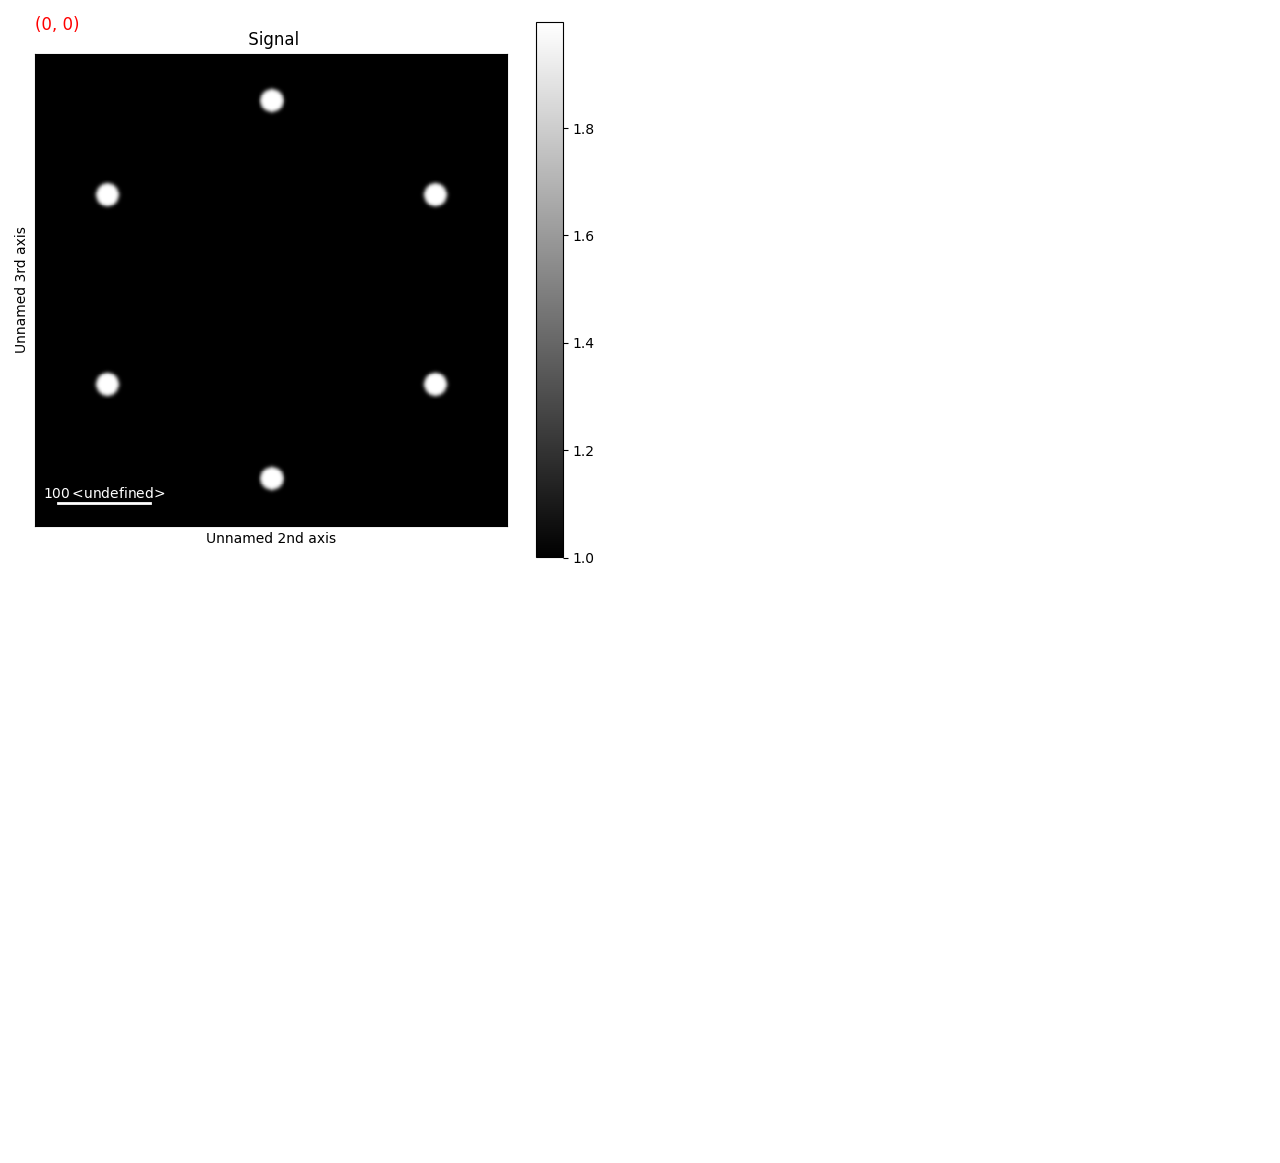

In [12]:
%matplotlib notebook
sixFoldLibrary.plot()

<IPython.core.display.Javascript object>


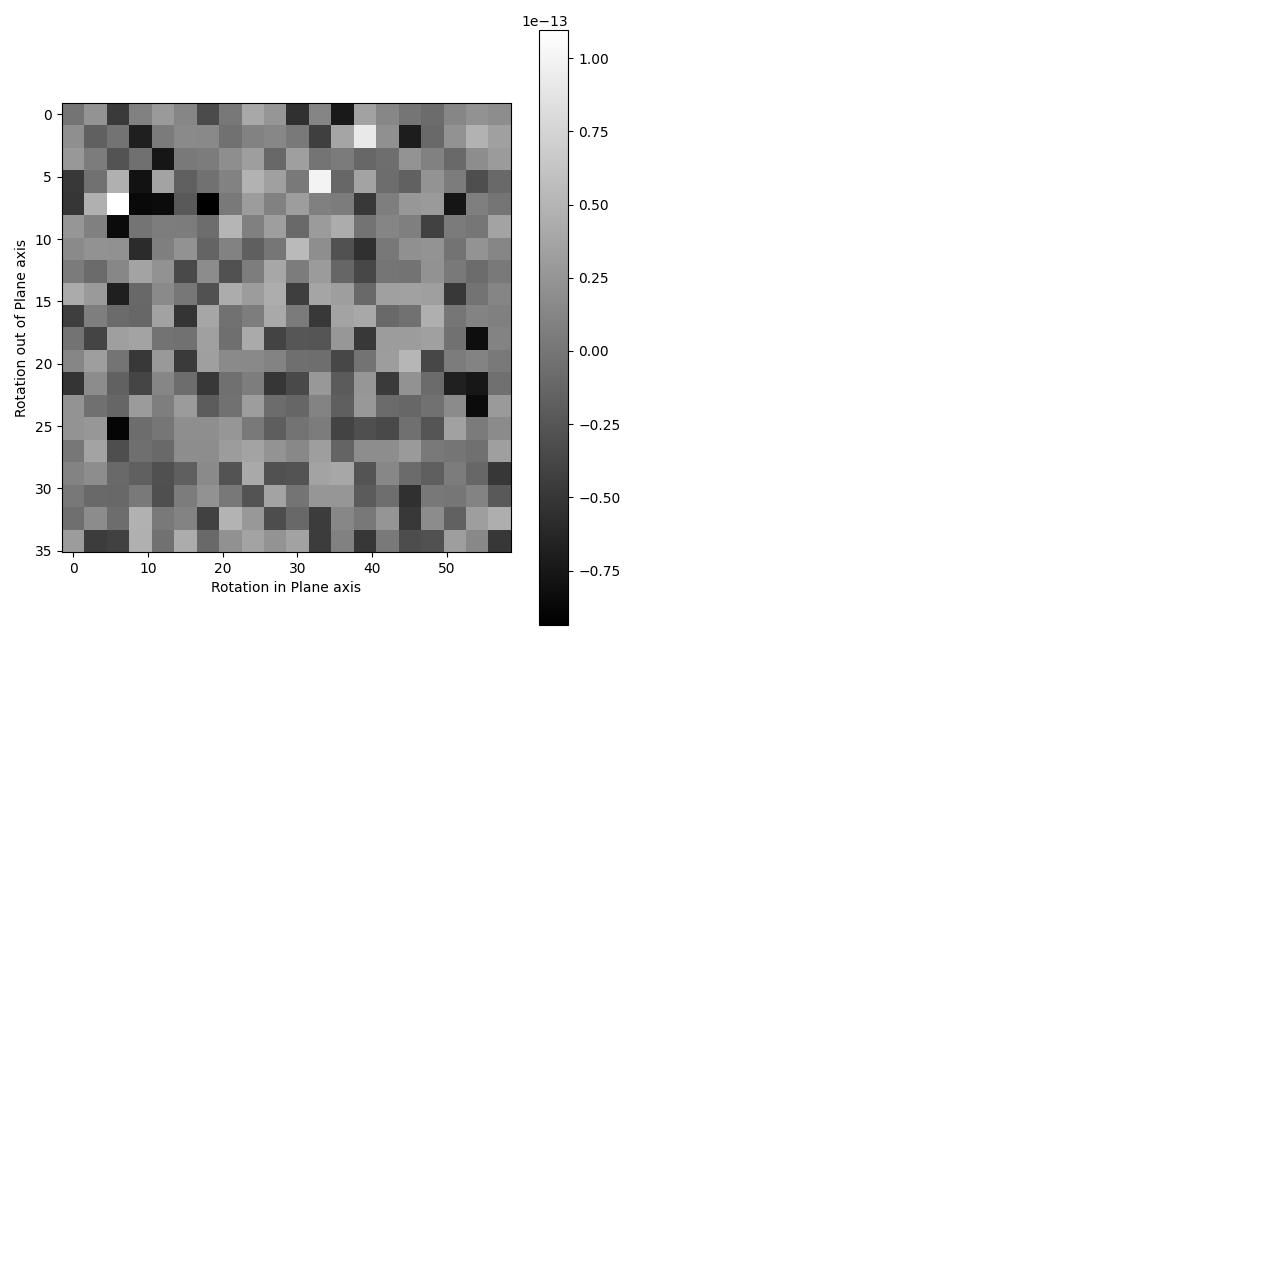

<IPython.core.display.Javascript object>


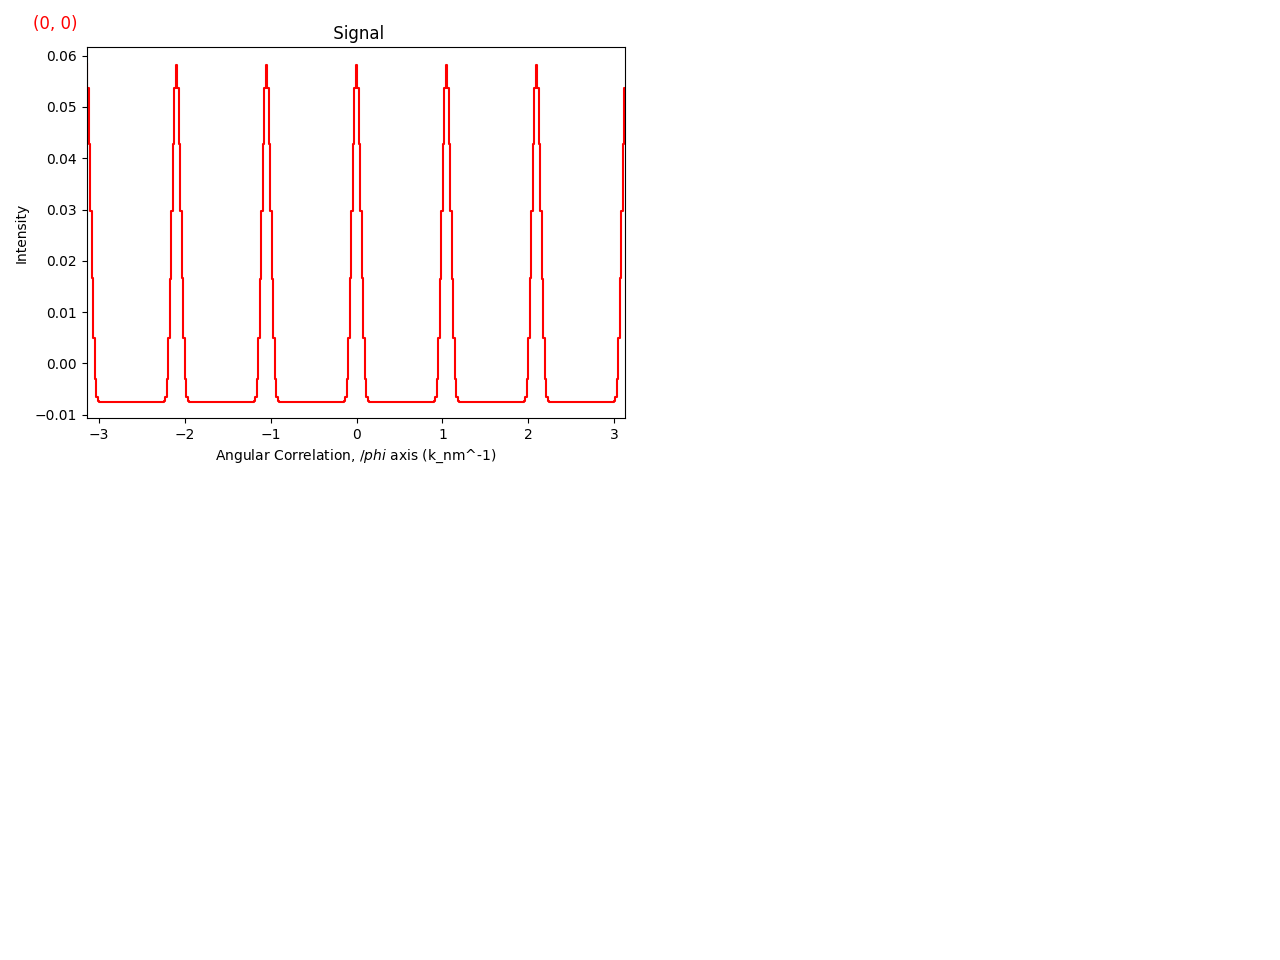

In [13]:
sixFoldLibrary.unit = "k_nm^-1"
sixFoldLibrary.beam_energy=200
sixFoldLibrary_pol = sixFoldLibrary.get_azimuthal_integral2d(npt_rad=100)
# One slice along the angular correlation
sixFoldLibrary_pol.get_angular_correlation().isig[:,180.].plot()

I think this brings up a really good point in that as long as our Ewald sphere is alomst flat then Fridel symmetry will be maintained.  This means that to measure the deviation parameter what we need a good way to compare the intensity at $\pi$ and $\pi/3$,$-\pi/3$, $2\pi/3$ and $-2\pi/3$ where $\pi$ is effectively the average of the intensity squared and $\pi/3$ etc.

If we assume Fridel symmetry for a 6-fold symmetric diffraction pattern then the intensity for each pair will be equal $I_1=I_4$, $I_2=I_5$ and $I_3=I_6$

Where $I_1$ is at $\theta = 0$, $I_2$ is at $\theta = \frac{\pi}{3}$ , $I_3$ is at $\theta = \frac{2\pi}{3}$,
$I_4$ is at $\theta = \frac{3\pi}{3}$, $I_5$ is at $\theta = \frac{4\pi}{3}$,$I_6$ is at $\theta = \frac{5\pi}{3}$

|--------------------$\Phi$----------------- |-------------------Equation------------------|--------------------Equal To-------------------  |
|---|:----------------------------------------:|---|
|  0 | $I_1^2+I_2^2+I_3^2+I_1^2+I_2^2+I_3^2$|$\frac{3\pi}{3}$   | 
|  $\frac{\pi}{3}$ | $2*(I_1*I_2+I_2*I_3+I_3*I_1)$ | $\frac{2\pi}{3}$,$\frac{4\pi}{3}$, $\frac{5\pi}{3}$ |
|  $\frac{2\pi}{3}$ |  $2*(I_1*I_3+I_2*I_1+I_3*I_2)$ |  $\frac{\pi}{3}$,$\frac{4\pi}{3}$, $\frac{5\pi}{3}$   |
|  $\frac{3\pi}{3}$ | $I_1^2+I_2^2+I_3^2+I_1^2+I_2^2+I_3^2$  | 0  |
|  $\frac{4\pi}{3}$ |$2*(I_1*I_2+I_2*I_3+I_3*I_1)$  |  $\frac{2\pi}{3}$,$\frac{\pi}{3}$, $\frac{5\pi}{3}$   |
|  $\frac{5\pi}{3}$ | $2*(I_1*I_3+I_2*I_1+I_3*I_2)$  |  $\frac{2\pi}{3}$,$\frac{4\pi}{3}$, $\frac{\pi}{3}$   |

**You might ask yourself why do we need this information?**: Having this information gives us the best way to measure how far from some zone axis we actually are.  This is fairly important as it gives us a way to measure the disorder of some cluster.  

<IPython.core.display.Javascript object>


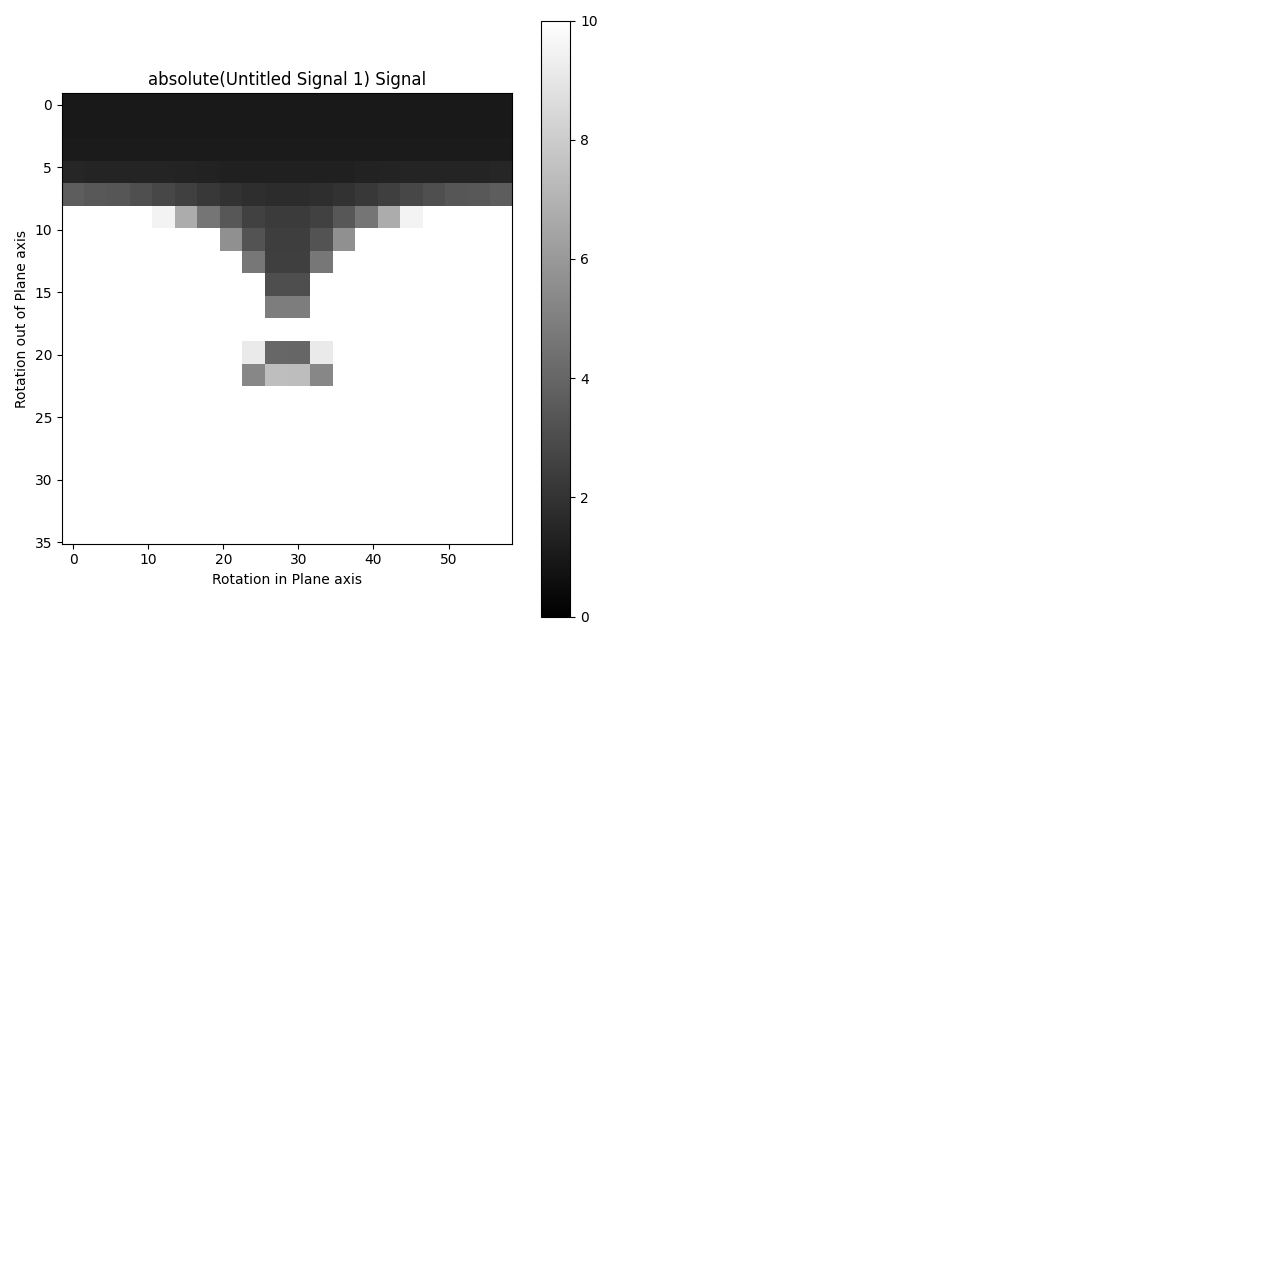

In [14]:
cor = sixFoldLibrary_pol.get_angular_correlation()
ratio= np.abs((cor.isig[0,180.]/cor.isig[np.pi/3,180.]).T)
ratio.plot(vmax=10, vmin=0)

**What if...**

This kind of brings up some question as to if glasses have Fridel symmetry or not.  With the curvature of the Ewald sphere and a fuzzy edge to some cluster then the shape function for some cluster will shrink as the size of the cluster grows.  The ringing effect disappears as well and we get more of a Gaussian type shape function.

<a id='Part3'></a>  **Part 3: Building a basic Simulation using SymSim**

You can build a full simulation cube using SymSim.  This is interesting to give a full picture of some clusters and then use that to test how well you can reconstruct the ground truth.

In [15]:
from SymSim.sim.simulation_cube import SimulationCube

In [16]:
cube =SimulationCube()

In [17]:
cube.add_random_clusters(100,
                            radius_range=(.5, 1.0),
                            k_range=(3.5, 4.5),
                            random_rotation=True,
                            symmetry=[2, 4, 6, 10])

In [18]:
cube.plot_symmetries()

<IPython.core.display.Javascript object>

In [ ]:
sig = cube.get_4d_stem(convergence_angle=.7,
                    accelerating_voltage=200,
                    k_rad = 5.0,
                    simulation_size=(50, 50, 128, 128),
                    noise = True,
                    num_electrons=1000,
                    convolve=True,
                    beam_size=2)

<IPython.core.display.Javascript object>


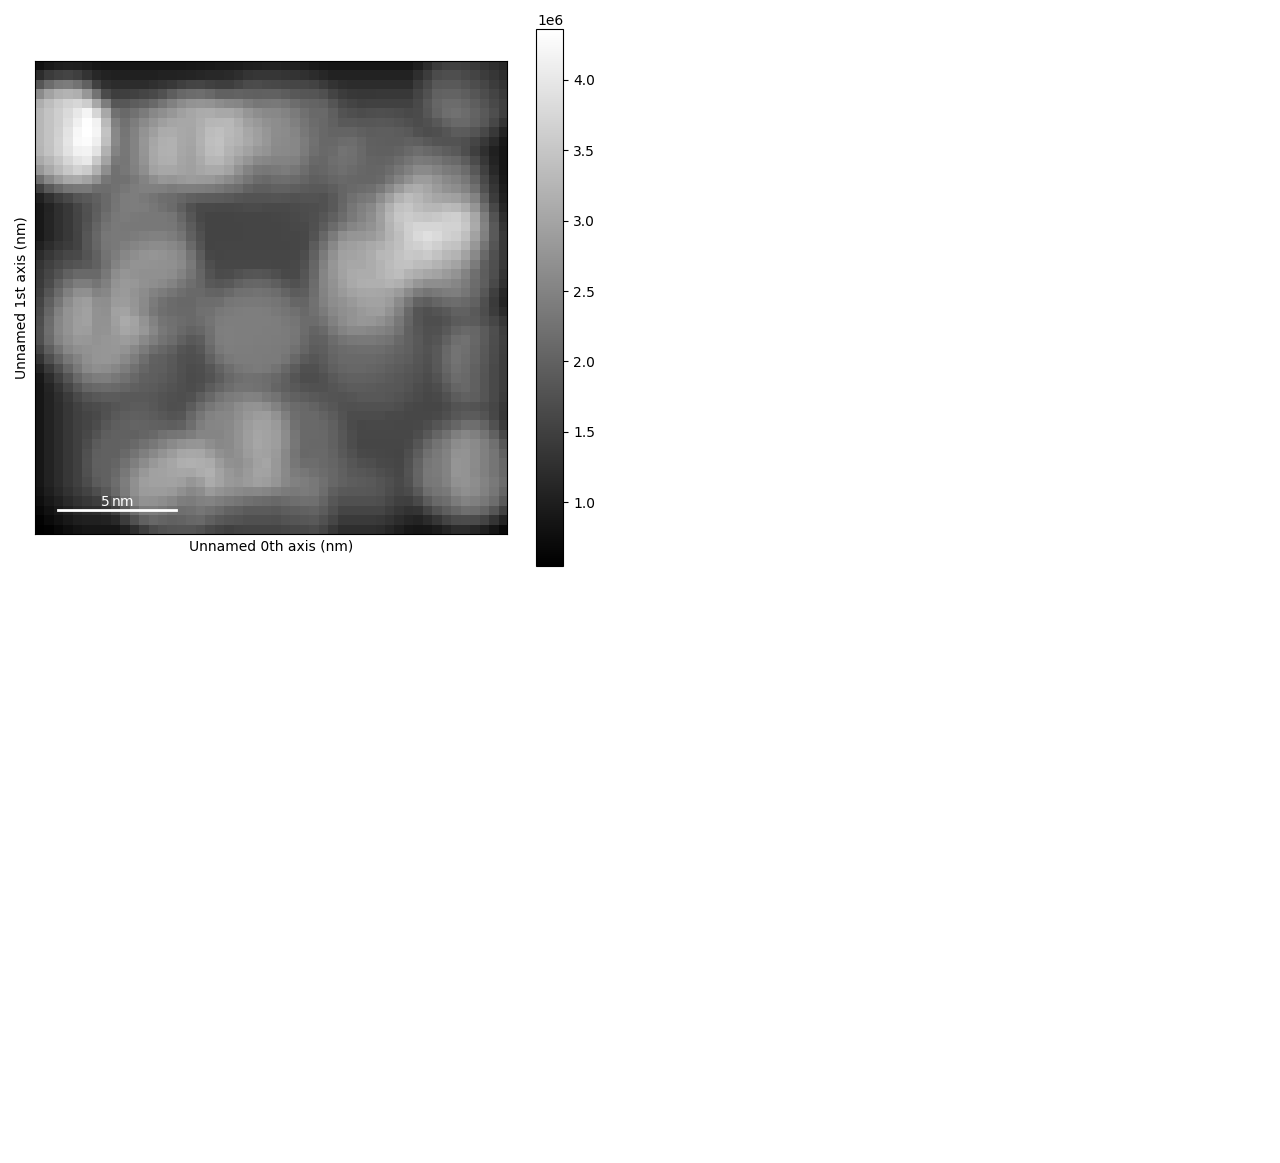

<IPython.core.display.Javascript object>


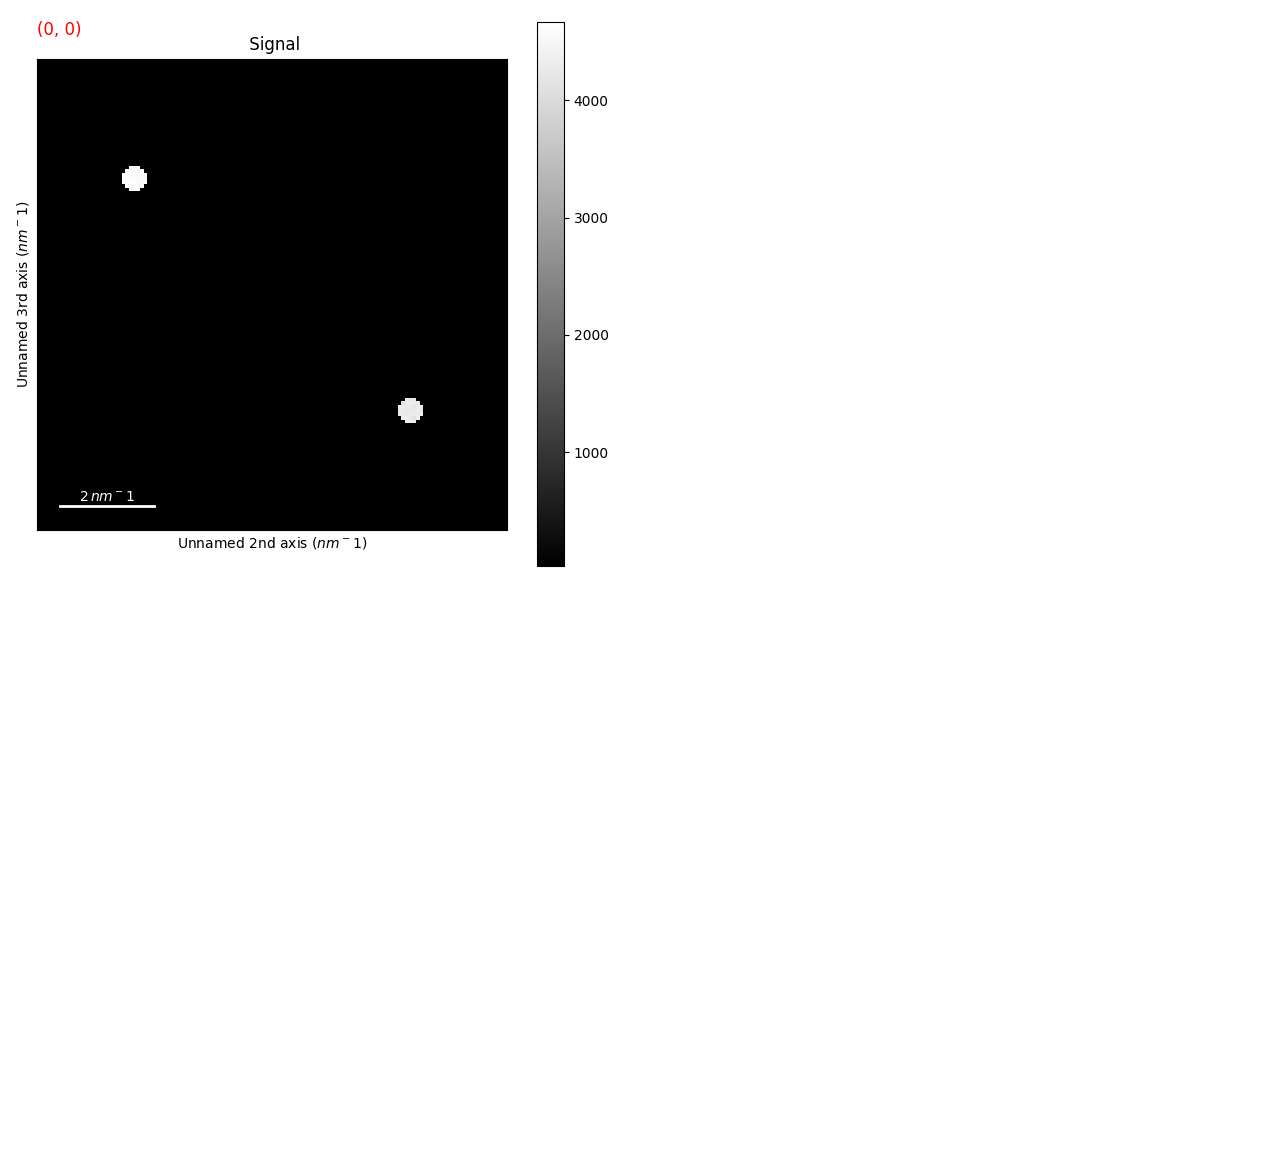

In [18]:
sig.plot()

<a id='Part4'></a>  **Part 4: Building an Advanced Simulation using AmorphSim**

In [19]:
AmorphSim.draw.draw3d.Icoshedron_3d()

NameError: name 'AmorphSim' is not defined

In [ ]:
AmorphSim.

<a id='Part5'></a>  **Part 5: Recovering Strucuture from a Glass using Angular Correlations**

<a id='Part6'></a>  **Part 6: Example with Experimental Data**